In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (8, 5)

Reading Data

In [137]:
df=pd.read_excel("Data/raw_data/train(1).xlsx")
main_test_df=pd.read_excel("Data/raw_data/test2.xlsx")
test_df=main_test_df.copy()

In [138]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [139]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16204,5272200045,20141113T000000,378000,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
16205,9578500790,20141111T000000,399950,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
16206,7202350480,20140930T000000,575000,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
16207,1723049033,20140620T000000,245000,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
16208,6147650280,20150325T000000,315000,4,2.50,3130,5999,2.0,0,0,3,7,3130,0,2006,0,98042,47.3837,-122.099,3020,5997


In [140]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5773,9392500100,20140723T000000,249000,4,2.25,1860,9576,1.0,0,0,3,7,1400,460,1962,0,98032,47.3612,-122.284,1860,9576
4673,3205400230,20140716T000000,347000,3,1.00,1010,7200,1.0,0,0,3,7,1010,0,1968,0,98034,47.7225,-122.179,1120,7200
9000,8682291630,20141007T000000,559000,2,2.00,1930,5520,1.0,0,0,3,8,1930,0,2006,0,98053,47.7191,-122.022,1640,4533
9862,2473000130,20140626T000000,300000,3,2.25,1780,10395,1.0,0,0,3,8,1780,0,1967,0,98058,47.4539,-122.150,2080,9360
14864,1786700240,20141024T000000,472000,4,3.25,4350,7090,2.0,0,0,3,8,2870,1480,1999,0,98042,47.3747,-122.156,2490,7266


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [142]:
df.isnull().sum().sort_values(ascending=False)

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

In [143]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
test_df['date'] = pd.to_datetime(test_df['date'], format='%Y%m%dT%H%M%S')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month



In [144]:
df[['date', 'year', 'month']].head()

,date,year,month
0,2015-05-05,2015,5
1,2014-07-08,2014,7
2,2015-01-15,2015,1
3,2015-04-27,2015,4
4,2014-12-05,2014,12


Exploratory Data Analysis

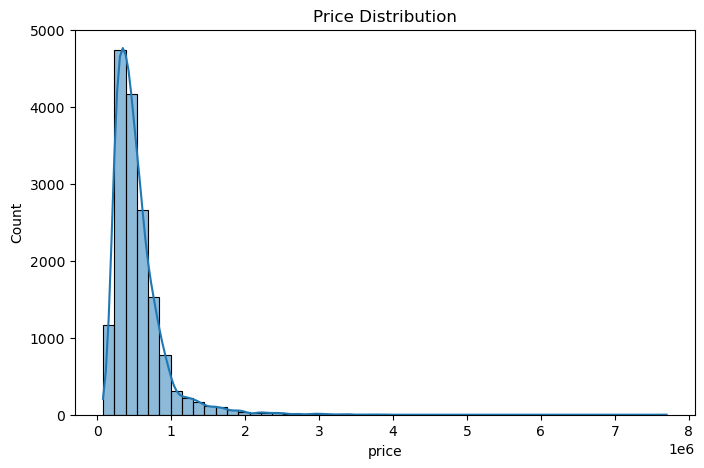

In [145]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

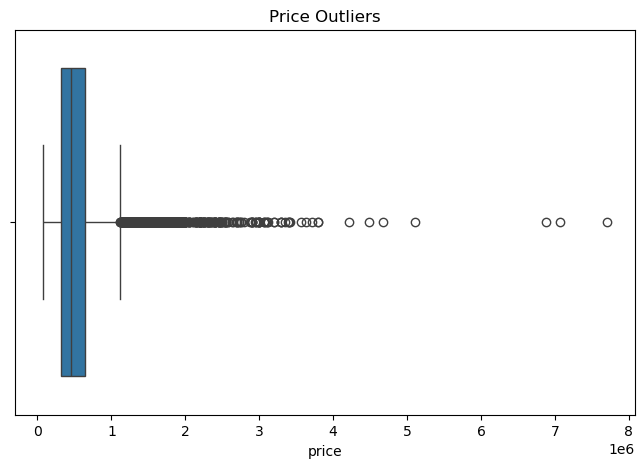

In [146]:
sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

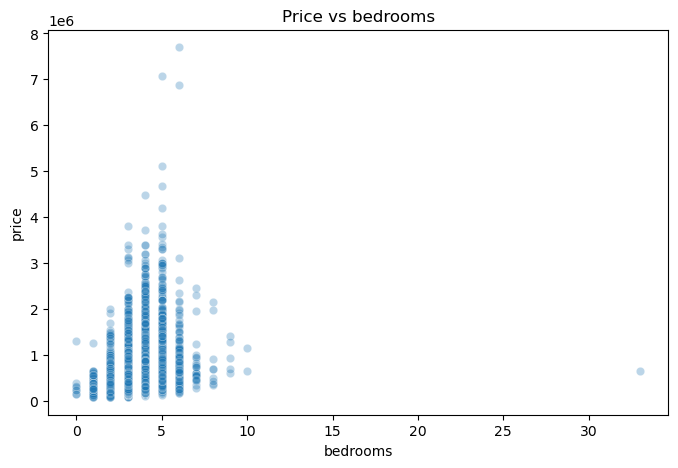

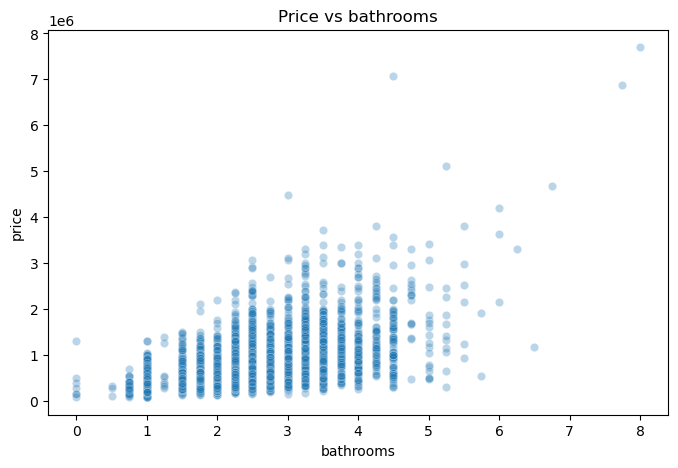

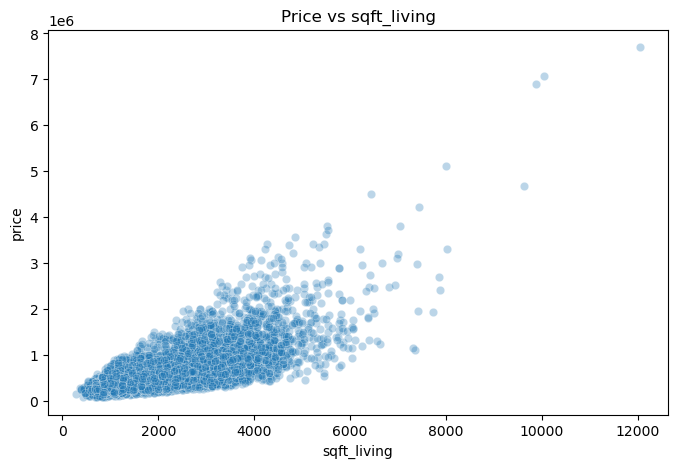

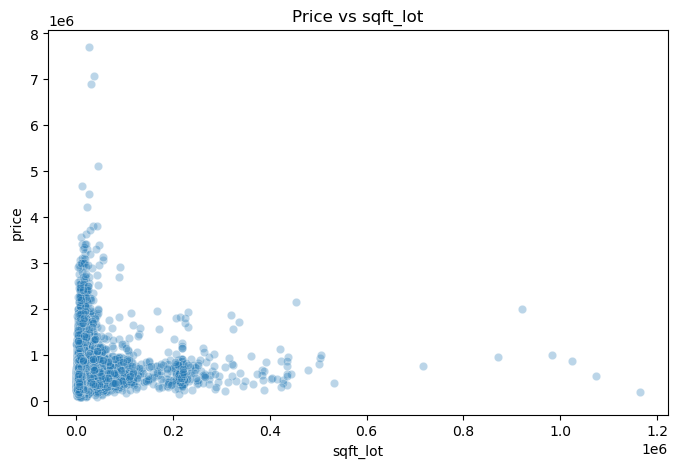

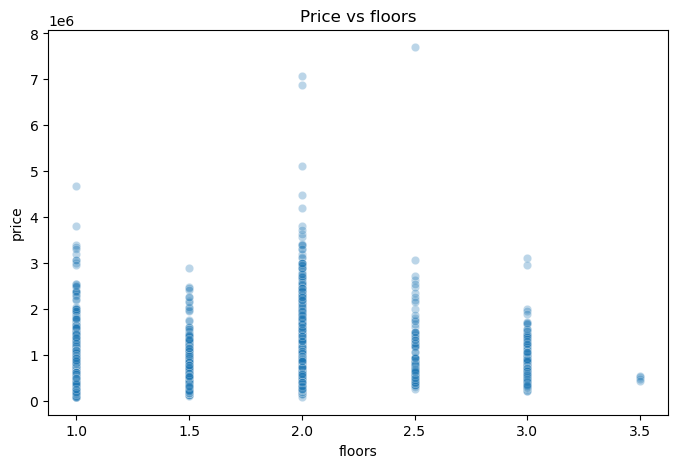

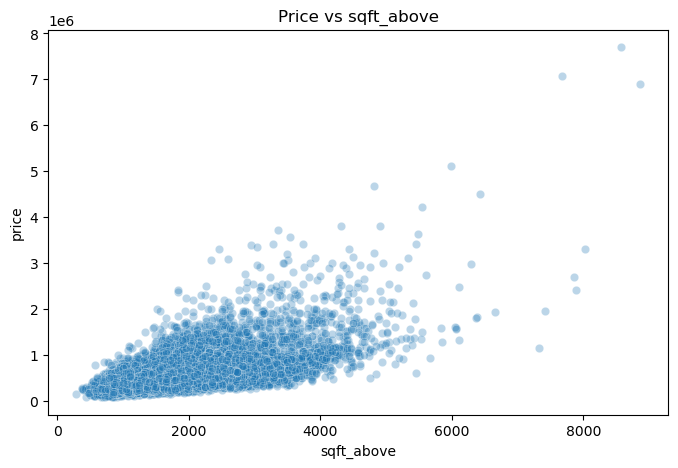

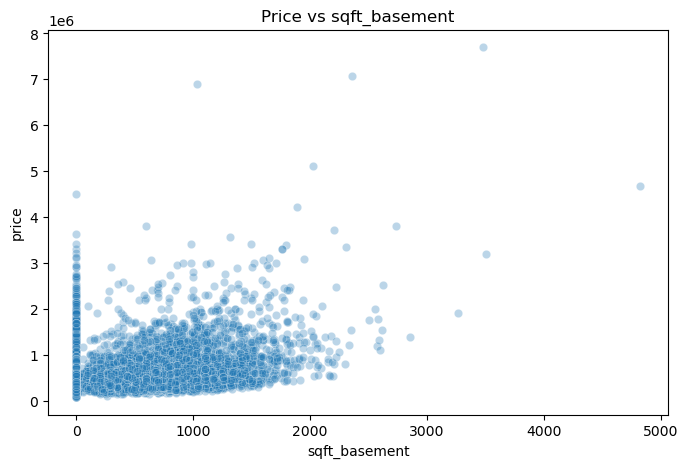

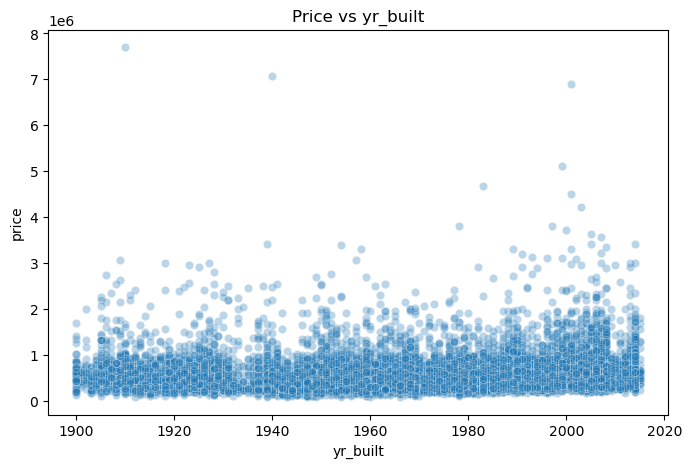

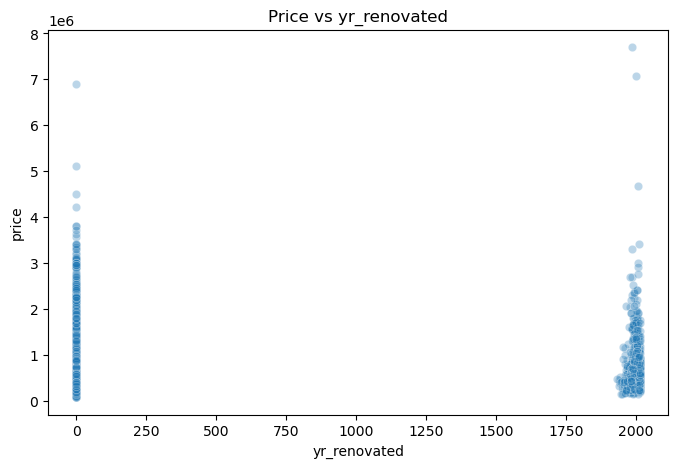

In [147]:
num_price_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated'
]

for col in num_price_features:
    sns.scatterplot(x=df[col], y=df['price'], alpha=0.3)
    plt.title(f"Price vs {col}")
    plt.show()


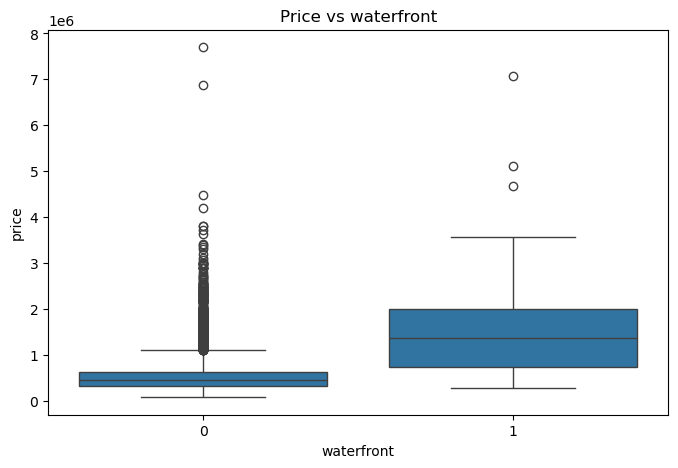

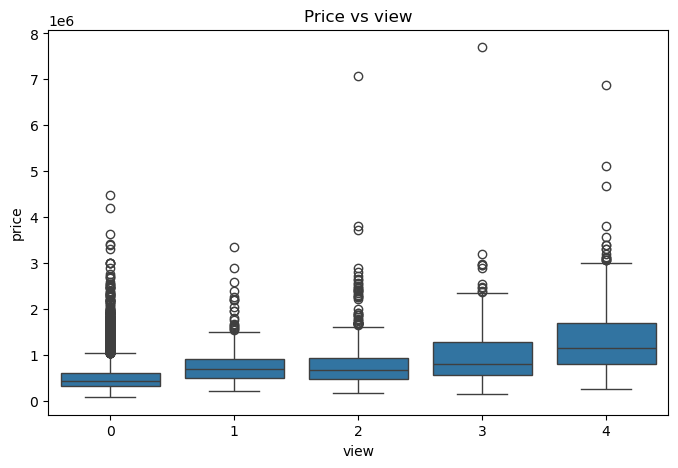

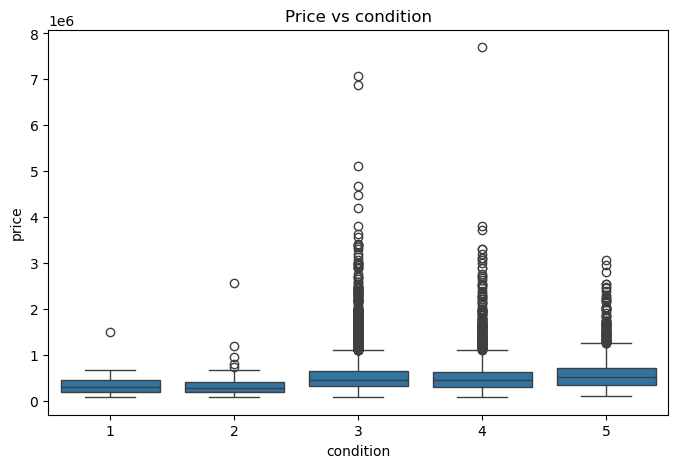

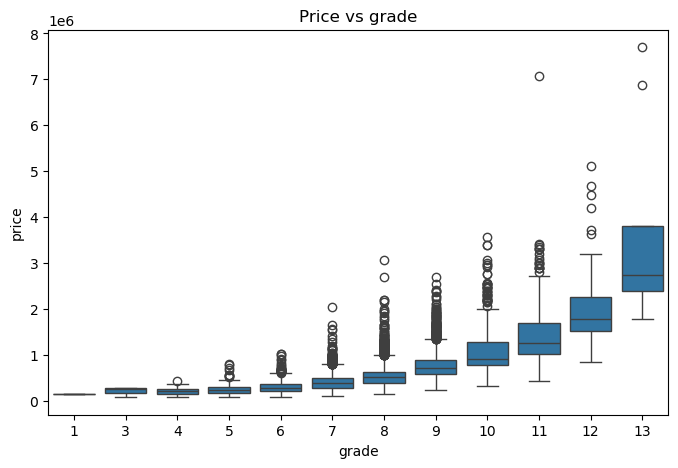

In [148]:
cat_price_features = ['waterfront', 'view', 'condition', 'grade']

for col in cat_price_features:
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f"Price vs {col}")
    plt.show()


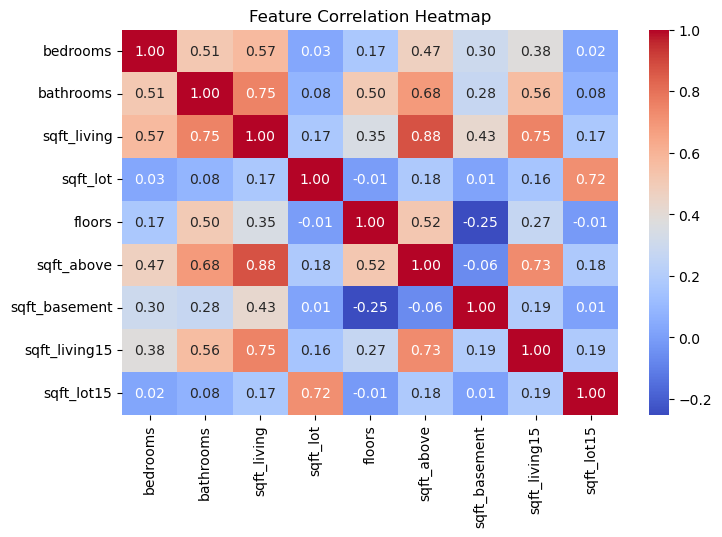

In [149]:
num_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15'
]

corr = df[num_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


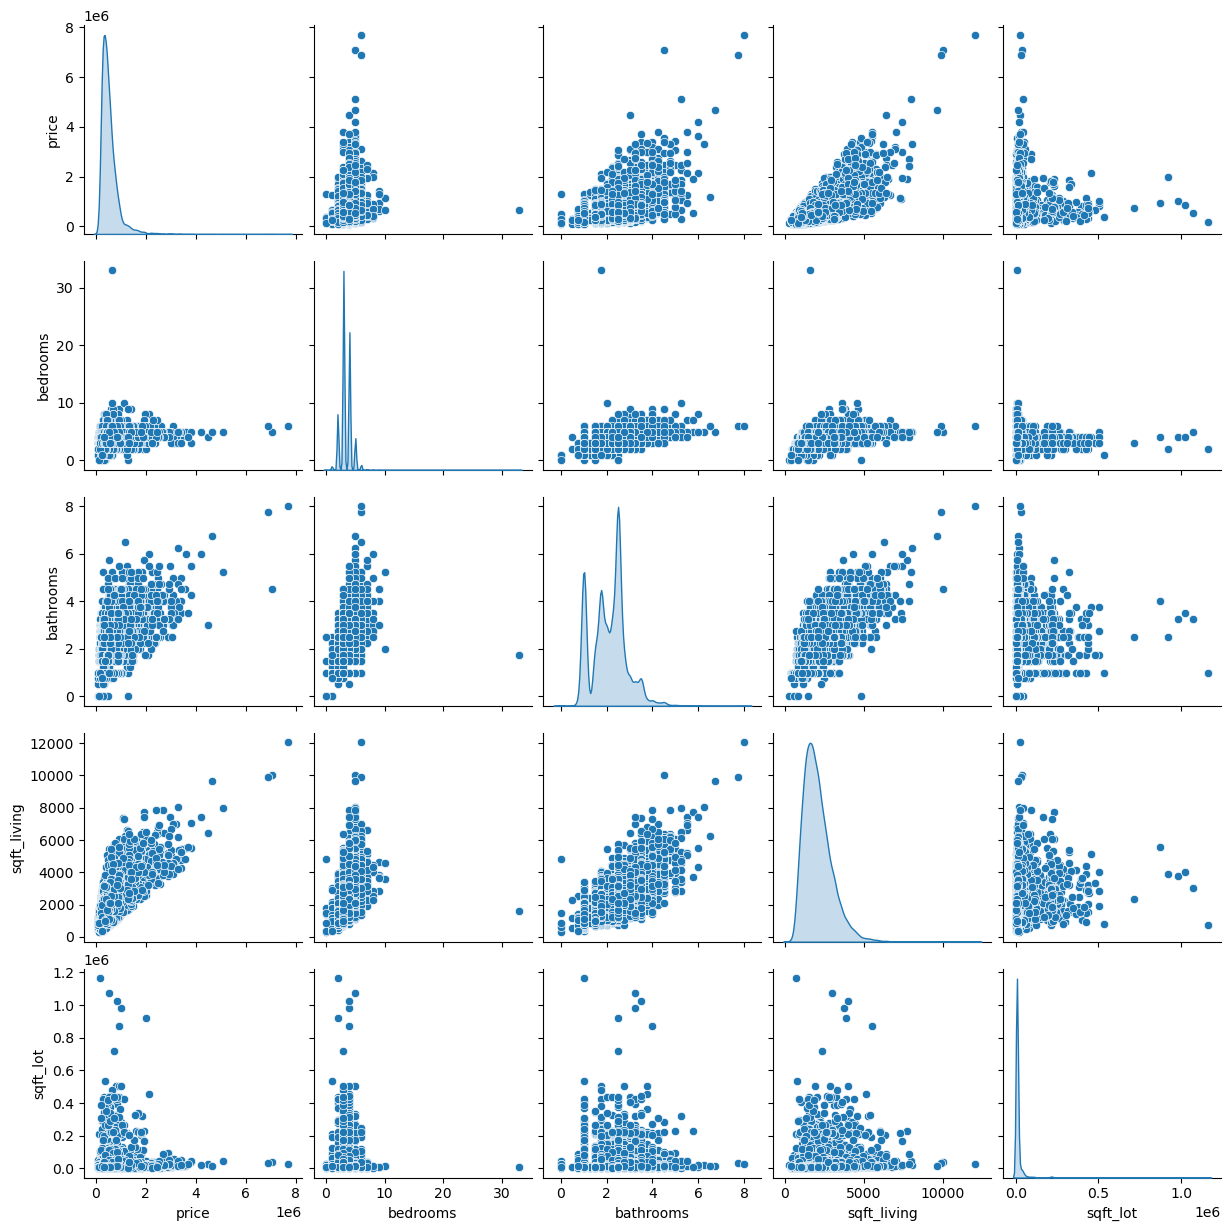

In [150]:
sns.pairplot(
    df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']],
    diag_kind='kde'
)
plt.show()


In [151]:
df['waterfront'].value_counts()

waterfront
0    16096
1      113
Name: count, dtype: int64

In [152]:
df.groupby('waterfront')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,16096.0,5.300675e+05,3.380519e+05,75000.0,320000.0,450000.0,635000.0,7700000.0
1,113.0,1.591938e+06,1.111034e+06,285000.0,735000.0,1360000.0,2000000.0,7062500.0


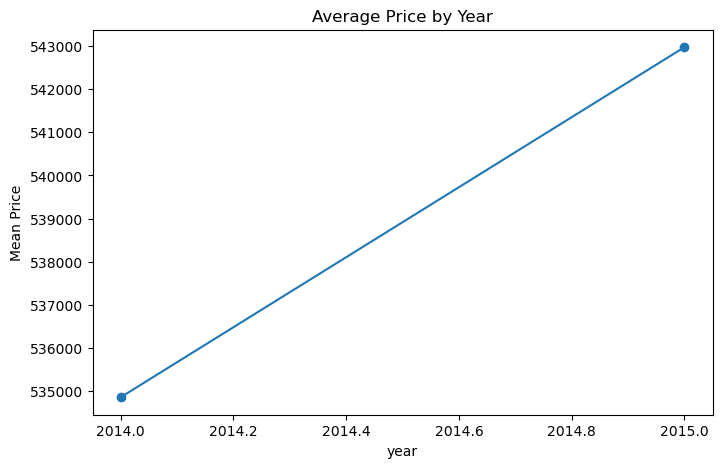

In [153]:
df.groupby('year')['price'].mean().plot(marker='o')
plt.title("Average Price by Year")
plt.ylabel("Mean Price")
plt.show()


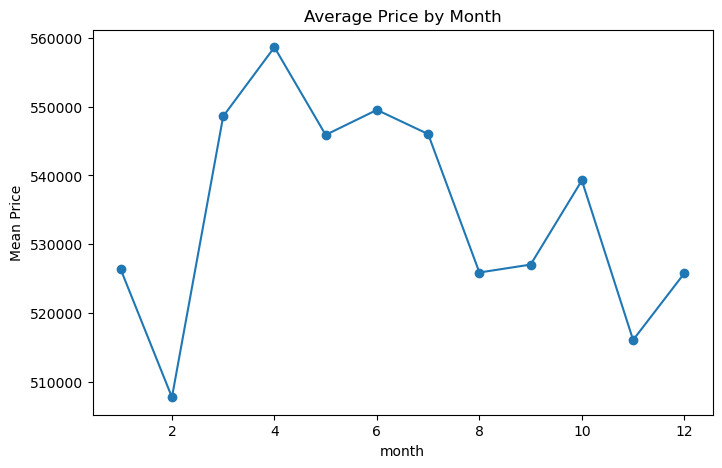

In [154]:
df.groupby('month')['price'].mean().plot(marker='o')
plt.title("Average Price by Month")
plt.ylabel("Mean Price")
plt.show()


Handling Outliers

In [155]:
continuous_features = [
    'sqft_living',
    'sqft_lot',
    'sqft_above',
    'sqft_basement',
    'sqft_living15',
    'sqft_lot15',
    'bedrooms',
    'bathrooms',
    'floors'
]

In [156]:

df_out = df.copy()

for col in continuous_features:
    upper_cap = df_out[col].quantile(0.99)
    df_out[col] = np.where(
        df_out[col] > upper_cap,
        upper_cap,
        df_out[col]
    )
    test_df[col] = np.where(
        test_df[col] > upper_cap,
        upper_cap,
        test_df[col]
    )

upper_cap=df_out['price'].quantile(.99)
df_out['price'] = np.where(
        df_out['price'] > upper_cap,
        upper_cap,
        df_out['price']
    )

df_out['log_price'] = np.log1p(df_out['price'])

Feature Engineering

In [157]:
df_out['basement_ratio'] = np.where(
    df_out['sqft_living'] > 0,
    df_out['sqft_basement'] / df_out['sqft_living'],
    0
)
df_out['relative_size'] = np.where(
    df_out['sqft_living15'] > 0,
    df_out['sqft_living'] / df_out['sqft_living15'],
    1
)
df_out['sqft_per_bedroom'] = np.where(
    df_out['bedrooms'] > 0,
    df_out['sqft_living'] / df_out['bedrooms'],
    df_out['sqft_living']  
)
df_out['bathroom_bedroom_ratio'] = np.where(
    df_out['bedrooms'] > 0,
    df_out['bathrooms'] / df_out['bedrooms'],
    df_out['bathrooms']
)
df_out['avg_floor_area'] = np.where(
    df_out['floors'] > 0,
    df_out['sqft_above'] / df_out['floors'],
    df_out['sqft_above']
)
df_out['renovated'] = df_out['yr_renovated'].apply(
    lambda x: 1 if x > 0 else 0
)
df_out.drop(columns=['yr_renovated'], inplace=True)

test_df['basement_ratio'] = np.where(
    test_df['sqft_living'] > 0,
    test_df['sqft_basement'] / test_df['sqft_living'],
    0
)
test_df['relative_size'] = np.where(
    test_df['sqft_living15'] > 0,
    test_df['sqft_living'] / test_df['sqft_living15'],
    1
)

test_df['sqft_per_bedroom'] = np.where(
    test_df['bedrooms'] > 0,
    test_df['sqft_living'] / test_df['bedrooms'],
    test_df['sqft_living']
)

test_df['bathroom_bedroom_ratio'] = np.where(
    test_df['bedrooms'] > 0,
    test_df['bathrooms'] / test_df['bedrooms'],
    test_df['bathrooms']
)

test_df['avg_floor_area'] = np.where(
    test_df['floors'] > 0,
    test_df['sqft_above'] / test_df['floors'],
    test_df['sqft_above']
)

test_df['renovated'] = test_df['yr_renovated'].apply(
    lambda x: 1 if x > 0 else 0
)

test_df.drop(columns=['yr_renovated'], inplace=True)


In [158]:
df_out[[
    'basement_ratio',
    'sqft_per_bedroom',
    'bathroom_bedroom_ratio',
    'avg_floor_area',
    'relative_size'
]].describe()

,basement_ratio,sqft_per_bedroom,bathroom_bedroom_ratio,avg_floor_area,relative_size
count,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,0.123361,615.989367,0.640267,1228.803148,1.050912
std,0.169737,211.560349,0.210367,433.384617,0.315725
min,0.000000,200.000000,0.000000,253.333333,0.179012
25%,0.000000,469.333333,0.500000,940.000000,0.879845
50%,0.000000,576.666667,0.625000,1180.000000,1.000000
75%,0.273038,722.500000,0.750000,1460.000000,1.163158
max,0.666667,4810.000000,2.500000,4380.000000,6.000000


In [159]:
ratio_features = [
    'basement_ratio',
    'bathroom_bedroom_ratio',
    'relative_size'
]

for col in ratio_features:
    upper_cap = df_out[col].quantile(0.99)
    df_out[col] = np.where(
        df_out[col] > upper_cap,
        upper_cap,
        df_out[col]
    )
    test_df[col] = np.where(
        test_df[col] > upper_cap,
        upper_cap,
        test_df[col]
    )


In [160]:
df_out.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,log_price,basement_ratio,relative_size,sqft_per_bedroom,bathroom_bedroom_ratio,avg_floor_area,renovated
10059,9195700380,2014-08-11,620000.0,4.0,2.25,1530.0,7845.0,1.0,0,0,4,7,1030.0,500.0,1981,98027,47.5589,-122.082,1710.0,7627.0,2014,8,13.337476,0.326797,0.894737,382.500000,0.562500,1030.0,0
5366,7853360850,2015-01-16,471500.0,3.0,2.50,2430.0,5866.0,2.0,0,0,3,7,2430.0,0.0,2009,98065,47.5158,-121.871,2380.0,5866.0,2015,1,13.063677,0.000000,1.021008,810.000000,0.833333,1215.0,0
2658,3649100264,2014-08-15,405000.0,3.0,2.00,1740.0,18000.0,1.0,0,0,3,7,1230.0,510.0,1989,98028,47.7397,-122.242,1740.0,11250.0,2014,8,12.911645,0.293103,1.000000,580.000000,0.666667,1230.0,0
6684,3034200198,2014-06-03,689800.0,3.0,2.75,2390.0,9313.0,1.0,0,0,5,8,1390.0,1000.0,1942,98133,47.7209,-122.331,2390.0,12712.0,2014,6,13.444158,0.418410,1.000000,796.666667,0.916667,1390.0,0
9441,2223059099,2014-07-09,284000.0,3.0,1.50,1500.0,10018.0,1.0,0,0,4,7,1500.0,0.0,1957,98058,47.4680,-122.163,1500.0,10937.0,2014,7,12.556733,0.000000,1.000000,500.000000,0.500000,1500.0,0
11072,2804100095,2014-05-16,724800.0,3.0,2.00,2050.0,3933.0,1.0,0,0,3,8,1180.0,870.0,1926,98112,47.6436,-122.303,1940.0,4000.0,2014,5,13.493652,0.424390,1.056701,683.333333,0.666667,1180.0,1
2257,6341000020,2015-03-04,226000.0,2.0,1.00,1510.0,19874.0,1.0,0,0,3,7,1510.0,0.0,1951,98146,47.4924,-122.340,1540.0,10000.0,2015,3,12.328295,0.000000,0.980519,755.000000,0.500000,1510.0,0
8098,4307320230,2014-10-14,345000.0,4.0,2.50,2390.0,6976.0,2.0,0,0,3,7,2390.0,0.0,2003,98056,47.4807,-122.182,2390.0,6346.0,2014,10,12.751303,0.000000,1.000000,597.500000,0.625000,1195.0,0
2806,6083000083,2014-06-11,248000.0,5.0,1.50,1510.0,9078.0,1.0,0,0,4,7,1510.0,0.0,1959,98168,47.4852,-122.305,1480.0,9078.0,2014,6,12.421188,0.000000,1.020270,302.000000,0.300000,1510.0,0
14524,3343901440,2015-05-11,379000.0,4.0,1.75,2180.0,7876.0,1.0,0,0,4,7,1290.0,890.0,1977,98056,47.5157,-122.191,1960.0,7225.0,2015,5,12.845294,0.408257,1.112245,545.000000,0.437500,1290.0,0


In [161]:
df_out.drop(columns=['date'], inplace=True)
test_df.drop(columns=['date'], inplace=True)

In [162]:
df_out['zipcode'].nunique()

70

In [163]:

from sklearn.preprocessing import LabelEncoder
import joblib

le = LabelEncoder()
df_out['zipcode_encoded'] = le.fit_transform(df_out['zipcode'])

joblib.dump(le, "artifacts/zipcode_encoder.pkl")

le = joblib.load("artifacts/zipcode_encoder.pkl")

test_df['zipcode_encoded'] = le.transform(test_df['zipcode'])



In [164]:
df_out.drop(columns=['zipcode'], inplace=True)
test_df.drop(columns=['zipcode'], inplace=True)


In [165]:
df_out.to_csv("Data/final_train_test_data/train_df.csv", index=False)
test_df.to_csv("Data/final_train_test_data/test_df.csv", index=False)

In [166]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(
#     df_out,
#     test_size=0.2,
#     random_state=42
# )


In [167]:


image_metadata_train = df_out[['id', 'lat', 'long']]
image_metadata_main_test  = main_test_df[['id', 'lat', 'long']]

image_metadata_train.to_csv("Data/lat_long/image_metadata_train.csv", index=False)
# image_metadata_test.to_csv("Data/lat_long/image_metadata_test.csv", index=False)
image_metadata_main_test.to_csv("Data/lat_long/image_metadata_main_test.csv", index=False)


In [168]:
price_reference_train = df_out[['id', 'price', 'log_price']]
# price_reference_test  = test_df[['id', 'price', 'log_price']]

price_reference_train.to_csv("Data/price/price_reference_train.csv", index=False)
# price_reference_test.to_csv("Data/price/price_reference_test.csv", index=False)


In [169]:
# X_train = train_df.drop(columns=['id', 'price', 'log_price'])
# X_test  = test_df.drop(columns=['id', 'price', 'log_price'])
# main_test=main_test_df.drop(columns=['id'])

# y_train = train_df['log_price']
# y_test  = test_df['log_price']


In [170]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled  = scaler.transform(X_test)


In [171]:
# import numpy as np

# np.save("Data/final_train_test_data/X_train_scaled.npy", X_train_scaled)
# np.save("Data/final_train_test_data/X_test_scaled.npy", X_test_scaled)
# np.save("Data/final_train_test_data/y_train_log_price.npy", y_train.values)
# np.save("Data/final_train_test_data/y_test_log_price.npy", y_test.values)


In [172]:
# train_df.to_csv("Data/final_train_test_data/train_df.csv",index=False)
# test_df.to_csv("Data/final_train_test_data/test_df.csv",index=False)


In [173]:
print(test_df.shape)
print(df_out.shape)

(5404, 26)
(16209, 28)


In [174]:
set(df_out.columns)-set(test_df.columns)

{'log_price', 'price'}

In [175]:
df_out['price'].quantile(.998)

1944600.0000000005